In [1]:
import pandas as pd
import os
import requests
from acquire import get_items, new_stores, get_stores, get_sales, combined_data, combine_store_data, get_germany_power
from prepare import prep_combine, prep_opsd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [26]:
df = combine_store_data()

In [10]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013


1.) Convert date column to datetime format.

In [11]:
#right now it is an object
df.dtypes

item_id            int64
sale_amount      float64
sale_date         object
sale_id            int64
store_id           int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
item_brand        object
item_name         object
item_price       float64
item_upc           int64
dtype: object

In [27]:
#turn sale_date into datetime
df.sale_date = pd.to_datetime(df.sale_date)

In [14]:
#checking for quality assurance
df.dtypes

item_id                        int64
sale_amount                  float64
sale_date        datetime64[ns, UTC]
sale_id                        int64
store_id                       int64
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
item_brand                    object
item_name                     object
item_price                   float64
item_upc                       int64
dtype: object

<br>

2.) Plot the distribution of sale_amount and item_price.

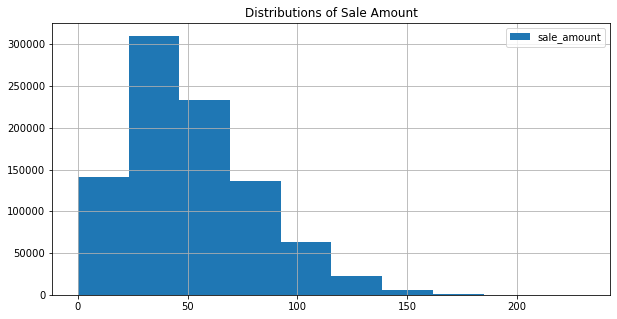

In [32]:
#distributuon of sale amount, and item price
plt.figure(figsize=(10,5))
df.sale_amount.hist(label='sale_amount')
plt.legend()
plt.title('Distributions of Sale Amount')
plt.show()

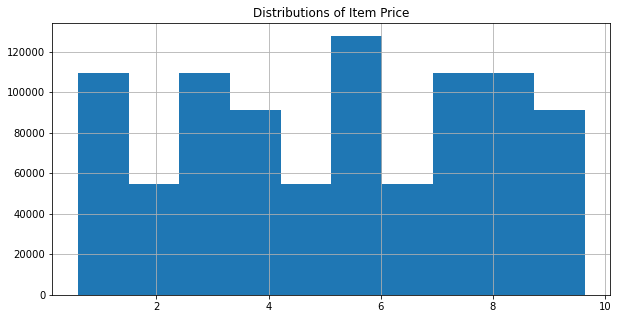

In [34]:
plt.figure(figsize=(10,5))
df.item_price.hist(label='item_price')
plt.title('Distributions of Item Price')
plt.show()

<br>

3.) Set the index to be the datetime variable.

In [21]:
#as you wish
df = df.set_index('sale_date')

4.) Add a 'month' and 'day of week' column to your dataframe.

In [26]:
df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()

In [27]:
df

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc,month,day_of_week
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Tuesday
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Wednesday
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Thursday
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Friday
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,50,63.0,912996,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Wednesday
2017-12-28 00:00:00+00:00,50,59.0,912997,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Thursday
2017-12-29 00:00:00+00:00,50,74.0,912998,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Friday


5.) Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [28]:
df['sales_total'] = df.sale_amount * df.item_price

In [29]:
df

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Wednesday,9.24
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Thursday,11.76
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Friday,10.92
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Saturday,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,50,63.0,912996,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Wednesday,327.60
2017-12-28 00:00:00+00:00,50,59.0,912997,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Thursday,306.80
2017-12-29 00:00:00+00:00,50,74.0,912998,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Friday,384.80


6.) Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [3]:
df = prep_combine(df)

In [4]:
df

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Tuesday,10.92
2013-01-02 00:00:00+00:00,1,11.0,2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Wednesday,9.24
2013-01-03 00:00:00+00:00,1,14.0,3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Thursday,11.76
2013-01-04 00:00:00+00:00,1,13.0,4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Friday,10.92
2013-01-05 00:00:00+00:00,1,10.0,5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,1,Saturday,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27 00:00:00+00:00,50,63.0,912996,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Wednesday,327.60
2017-12-28 00:00:00+00:00,50,59.0,912997,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Thursday,306.80
2017-12-29 00:00:00+00:00,50,74.0,912998,10,8503 NW Military Hwy,San Antonio,TX,78231,Choice,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,12,Friday,384.80


<br>

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [7]:
gp = get_germany_power()

In [8]:
gp

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.18400,NaN,NaN,NaN
1,1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2,2006-01-03,1442.53300,NaN,NaN,NaN
3,3,2006-01-04,1457.21700,NaN,NaN,NaN
4,4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...,...
4378,4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [15]:
gp = gp.drop(columns=['Unnamed: 0'])

1.) Convert date column to datetime format.


In [11]:
gp.Date = pd.to_datetime(gp.Date)

In [12]:
gp.dtypes

Unnamed: 0              int64
Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

<br>

2.) Plot the distribution of each of your variables.

In [19]:
gp_cols = gp.columns.to_list()

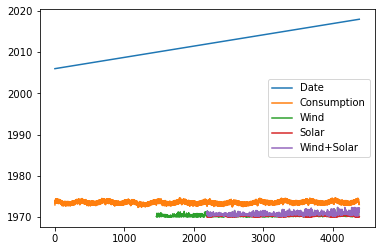

In [25]:
for i in gp_cols:
    gp[i].plot(label=i)
    plt.legend()

<ipython-input-41-6174b9355708>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  gp.hist(ax = ax)


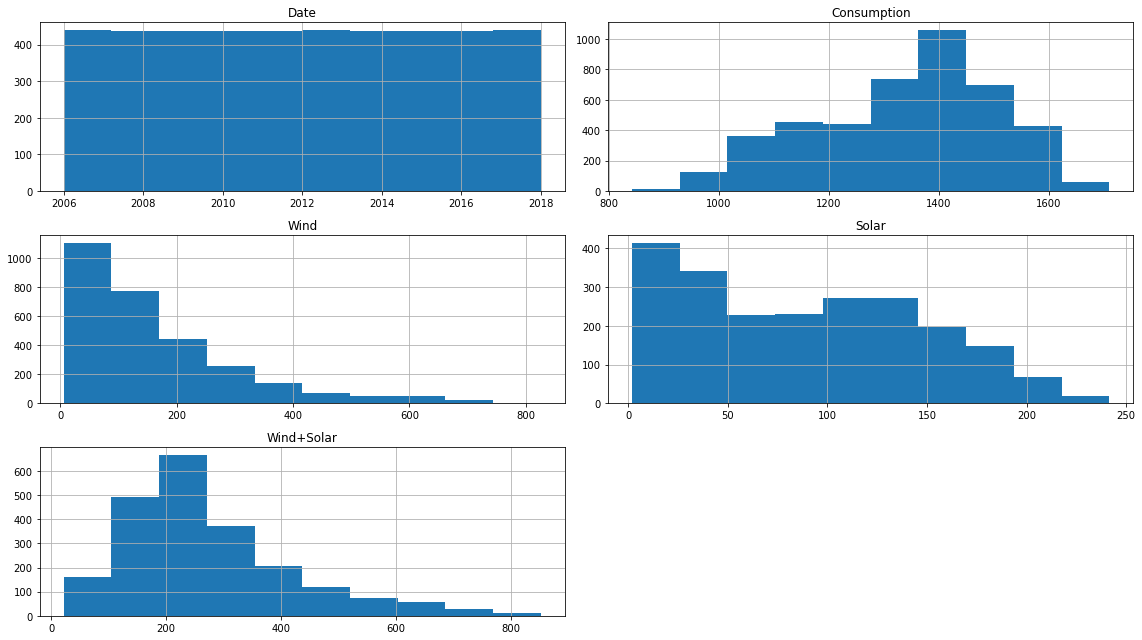

In [41]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca()
gp.hist(ax = ax)
plt.tight_layout()

3.) Set the index to be the datetime variable.

In [42]:
gp = gp.set_index('Date')

4.) Add a month and a year column to your dataframe.

In [43]:
gp['month']=gp.index.month

In [44]:
gp['year']=gp.index.year

In [45]:
gp

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,1,2006
2006-01-02,1380.52100,NaN,NaN,NaN,1,2006
2006-01-03,1442.53300,NaN,NaN,NaN,1,2006
2006-01-04,1457.21700,NaN,NaN,NaN,1,2006
2006-01-05,1477.13100,NaN,NaN,NaN,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


5.) Fill any missing values.

In [47]:
gp.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [48]:
gp = gp.fillna(0)

In [49]:
gp.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [3]:
gp=get_germany_power()

In [4]:
gp = prep_opsd(gp)

In [5]:
gp

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


In [6]:
gp.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [8]:
gp.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
month            int64
year             int64
dtype: object

In [9]:
gp.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)